# Bài tập 6

Nguyễn Đỗ Chí Thảo - 1712159


## Câu 1 (1 điểm)

Định nghĩa của deterministic noise (slide của Thầy Yaser, lecture 11 - overfitting, trang 16): "The part of $f$ that $\mathcal H$ cannot capture: $f(\mathbf{x}) − h^∗(\mathbf{x})$". Trong đó, $h^*(\mathbf{x})$ là hàm tốt nhất của $\mathcal H$ dùng để xấp xỉ $f$.

Giả sử ta có f là đa thức bậc 50, $H_{50}$ là tập hypothesis ứng với đa thức bậc 50, $H_{10}$ là tập hypothesis ứng với đa thức bậc 10.

Rõ ràng, trong $H_{50}$ ta có thể tìm ra $h^*(\mathbf{x})$ có thể "fit" vào tất các điểm dữ liệu (không xét đến stochastic noise). Tuy nhiên, trong $H_{10}$ chúng ta không thể tìm ra $h^*(\mathbf{x})$ có thể "fit" vào tất cả các điểm dữ liệu (không xét đến stochastic noise) bởi vẫn còn phần mà $\mathcal H_{10}$ không thể "capture". Do đó, số lượng deterministic noise sẽ tăng lên.


B

## Câu 2 (1 điểm)

In [2]:
import numpy as np
train_data = np.loadtxt("in.dta")
train_X=train_data[:,0:2]
train_Y=train_data[:,[2]]

In [3]:
def LinearRegression(X, ys):
    iteration = 0
    X_dagger = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w = np.dot(X_dagger, ys)
    return w

In [4]:
x1=train_X[:,0]
x2=train_X[:,1]
N=len(train_data)
z_train = np.array([[1,x1[i],x2[i],x1[i]**2,x2[i]**2,x1[i]*x2[i],abs(x1[i]-x2[i]),abs(x1[i]+x2[i])] for i in range(N)])
w=LinearRegression(z_train, train_Y)

predictions_training = np.sign(np.dot(z_train, w))
E_in=np.mean(train_Y != predictions_training)
print('E_in={}'.format(E_in))

E_in=0.02857142857142857


In [5]:
test_data = np.loadtxt("out.dta")
test_X=test_data[:,0:2]
test_Y=test_data[:,[2]]
x1=test_X[:,0]
x2=test_X[:,1]
N=len(test_data)
z_test = np.array([[1,x1[i],x2[i],x1[i]**2,x2[i]**2,x1[i]*x2[i],abs(x1[i]-x2[i]),abs(x1[i]+x2[i])] for i in range(N)])

predictions_testing = np.sign(np.dot(z_test, w))
E_out=np.mean(test_Y != predictions_testing)
print('E_out={}'.format(E_out))


E_out=0.084


A

## Câu 3 (1 điểm)

In [6]:
lamda=10**-3
N=z_train.shape[1]
w = np.dot(np.dot(np.linalg.inv(np.dot(z_train.T, z_train) + lamda* np.eye(N)), z_train.T),train_Y)

E_in=np.mean(train_Y != np.sign(np.dot(z_train, w)))

E_out=np.mean(test_Y != np.sign(np.dot(z_test, w)))

Error=np.array([E_in,E_out])

answer=np.array([[0.01,0.02,0.02,0.03,0.03],[0.02,0.04,0.06,0.08,0.1]]).T
dist=10
choose=-1
for i in answer:
    if np.linalg.norm(i-Error)<dist:
        dist=np.linalg.norm(i-Error)
        choose=i
print('E_in={}, E_out={}'.format(E_in,E_out))
print("Kết quả gần đúng nhất: ",choose)

E_in=0.02857142857142857, E_out=0.08
Kết quả gần đúng nhất:  [0.03 0.08]


D

## Câu 4 (1 điểm)

In [7]:
lamda=10**3
N=z_train.shape[1]
w = np.dot(np.dot(np.linalg.inv(np.dot(z_train.T, z_train) + lamda* np.eye(N)), z_train.T),train_Y)

E_in=np.mean(train_Y != np.sign(np.dot(z_train, w)))

E_out=np.mean(test_Y != np.sign(np.dot(z_test, w)))

Error=np.array([E_in,E_out])

answer=np.array([[0.2,0.2,0.3,0.3,0.4],[0.2,0.3,0.3,0.4,0.4]]).T
dist=10
choose=-1
for i in answer:
    if np.linalg.norm(i-Error)<dist:
        dist=np.linalg.norm(i-Error)
        choose=i
print('E_in={}, E_out={}'.format(E_in,E_out))
print("Kết quả gần đúng nhất: ",choose)

E_in=0.37142857142857144, E_out=0.436
Kết quả gần đúng nhất:  [0.4 0.4]


E

## Câu 5 (1 điểm)

In [8]:
k=[2,1,0,-1,-2]
N=z_train.shape[1]
minimum=10
for i in k:
    lamda=10**i
    w = np.dot(np.dot(np.linalg.inv(np.dot(z_train.T, z_train) + lamda* np.eye(N)), z_train.T),train_Y)
    E_out=np.mean(test_Y != np.sign(np.dot(z_test, w)))
    if E_out<minimum:
        minimum=E_out
        choose=i
print("k = {}, E_out = {}".format(choose,minimum))


k = -1, E_out = 0.056


D

## Câu 6 (1 điểm)

E_out_min=0.092 tại lamda=1


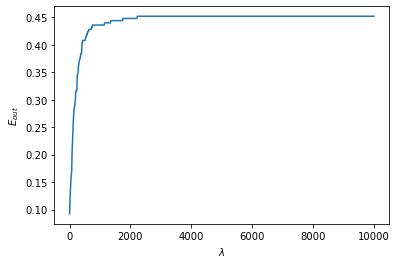

In [9]:
import matplotlib.pyplot as plt  

min_E_out = 100

lamda_l = np.arange(1, 10000, 10)
E_out_l = []

for lamda in lamda_l:
    w_reg = np.dot(np.dot(np.linalg.inv(np.dot(z_train.T, z_train) + lamda* np.eye(N)), z_train.T),train_Y)
    E_out = np.mean(test_Y != np.sign(np.dot(z_test, w_reg)))
    E_out_l.append(E_out)
    if E_out < min_E_out:
        min_E_out = E_out
        best_lamda = lamda
print("E_out_min={} tại lamda={}".format(min_E_out,best_lamda))
fig1 = plt.figure()
plt.plot(lamda_l, E_out_l)
plt.ylabel('$E_{out}$')
plt.xlabel('$\lambda$')
plt.show()

E_out_min=0.056 tại lamda=0.0935


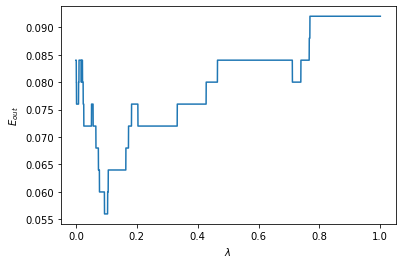

In [10]:
import matplotlib.pyplot as plt  

min_E_out = 100

lamda_l = np.arange(0, 1, 0.0001)
E_out_l = []

for lamda in lamda_l:
    w_reg = np.dot(np.dot(np.linalg.inv(np.dot(z_train.T, z_train) + lamda* np.eye(N)), z_train.T),train_Y)
    E_out = np.mean(test_Y != np.sign(np.dot(z_test, w_reg)))
    E_out_l.append(E_out)
    if E_out < min_E_out:
        min_E_out = E_out
        best_lamda = lamda
print("E_out_min={} tại lamda={}".format(min_E_out,best_lamda))
fig1 = plt.figure()
plt.plot(lamda_l, E_out_l)
plt.ylabel('$E_{out}$')
plt.xlabel('$\lambda$')
plt.show()

Xét hai miền giá trị của k: $k\ge0$ và $k<0$

Ta thấy rằng trong miền $k\ge0$, ta thấy rằng $E_{out}$ và $\lambda$ đồng biến. Do đó, trong miền $k\ge0$ $E_{out}$ đạt giá trị nhỏ nhất tại $\lambda = 1$ (hay $k=0$): $E_{out_{min}}=0.092$

Ta thấy rằng trong miền $k<0$, trong miền $\lambda \in [0,1)$, $E_{out}$ đạt giá trị bé nhất tại $\lambda = 0.1$ (hay $k=-1$): $E_{out_{min}}=0.056$

Do đó, giá trị nhỏ nhất của $E_{out}$: $E_{out_{min}}=0.056$

B

## Câu 7 (1 điểm)

Ta có:

$H(10,0,3)=\sum\limits_{q=0}^{2}w_{q}L_{q}(x) \Rightarrow H(10,0,3) \in H_2$

$H(10,0,4)=\sum\limits_{q=0}^{3}w_{q}L_{q}(x) \Rightarrow H(10,0,4)\in H_3$

$\Rightarrow H(10,0,3)\cup H(10,0,4)= H_{3}$

$\Rightarrow H(10,0,3)\cap H(10,0,4)= H_{2}$


Ta có:

$H(10,1,3)=\sum\limits_{q=0}^{2}( w_{q}L_{q}(x)) + \sum\limits_{q=3}^{10} L_{q}(x)\Rightarrow H(10,1,3) \in H_{10}$

$H(10,1,4)=\sum\limits_{q=0}^{3}( w_{q}L_{q}(x)) + \sum\limits_{q=4}^{10} L_{q}(x)\Rightarrow H(10,1,4) \in H_{10}$

$\Rightarrow H(10,1,3)\cap H(10,1,4)= H_{10}$

$\Rightarrow H(10,1,3)\cup H(10,1,4)= H_{10}$

Trong 5 đáp án, đáp án C đúng.

C

## Câu 8 (1 điểm)

![img](https://i.ibb.co/71zMcXP/nn.png)

**Xét quá trình lan truyền tiến (forward propagation):**

Từ tầng input đến tầng ẩn thứ 1: có 6 neural ở tầng input và 3 neural ở tầng ẩn thứ 1 (không tính neural "+1")

Do đó số lượng phép tính: $w^{(1)}_{ij}x^{(0)}_i$ bằng 6*3=18

Từ tầng tầng ẩn thứ 1 đến tầng ouput: có 4 neural ở tầng ẩn thứ 1 và 1 nerual ở tầng ouput:

Do đó số lượng phép tính: $w^{(2)}_{ij}x^{(1)}_i$ bằng 4*1=4

Số lượng phép tính $w^{(l)}_{ij}a^{(l-1)}_i$ là: 18 + 4 = 22

**Xét quá trình lan truyền ngược (back propagation):**

Từ $\delta^{L}_{j}$ ở tầng cuối, thực hiện lan truyền ngược để tính $\delta$ của các nơ-ron ở các tầng trước đó. 
Phép tính $w^{(l)}_{ij}\delta^{(l)}_j$ dùng để tính $\delta^{l-1}$ tại mỗi neural.

$\delta^{l}_{i}=\theta^{'}(s^{l}_{i}) \sum\limits_{k=1}^{d^{(l+1)}}w^{(l+1)}_{ij}\delta^{(l+1)}_j $

Ta chỉ tính $\delta^{1}$ ở tầng ẩn thứ nhất (L=1), không tính cho tầng input bởi không có giá trị cho việc cập nhật $w_{ij}$.

$\delta^{1}_{i}=\theta^{'}(s^{1}_{i})w^{(2)}_{i1}\delta^{(2)}_1$ với $i \in \{1,2,3\}$

Số lượng phép tính $w^{(l)}_{ij}\delta^{(l)}_j$ là: 3


Với mỗi trọng số $w^{(l)}_{ij}$, sẽ tính $\frac{\partial e}{\partial w^{(l)}_{ij}} = a^{(l-1)}_i\delta^{(l)}_j$.

Số lượng trọng số $w^{(l)}_{ij}$ bằng: 6*3+4=22

Do đó sẽ có 22 phép tính $a^{(l-1)}_i\delta^{(l)}_j$.

Tổng số phép tính $w^{(l)}_{ij}a^{(l-1)}_i$, $w^{(l)}_{ij}\delta^{(l)}_j$, $a^{(l-1)}_i\delta^{(l)}_j$ là: 22 + 3 + 22 = 47

D

## Câu 9 (1 điểm)

### Cách 1:

Gọi $m$ là số tầng ẩn, $\overline{x}$ là số neural trung bình có ở mỗi tầng

Ta có: $\overline{x}\times m+m=36$
$\Leftrightarrow\overline{x}=\frac{36-m}{m}$ (1) với $m\in N^{*}$.

Vì trong 36 neural ở tầng ẩn đã bao gồm các neural "+1". Do đó $m\le 18 $

Số lượng trọng số có thể có:

$S=10\overline{x}+(m-1)(\overline{x}+1)\overline{x}+(\overline{x}+1)$ (2)

Thay (1) vào (2):

$S=10\overline{x}+(m-1)(\overline{x}+1)\overline{x}+(\overline{x}+1)$

$\Leftrightarrow S=(36-m)\frac{47m-36}{m^2}+1$ (3)

Ta có bảng như sau

In [11]:
import pandas as pd
x=np.array(range(1,19))
y=(36-x)*(47*x-36)/x**2+1
data=np.array([x,y]).T
df=pd.DataFrame(data,columns=['x','y'])
print("Bảng 1")
df

Bảng 1


,x,y
0,1.0,386.000000
1,2.0,494.000000
2,3.0,386.000000
3,4.0,305.000000
4,5.0,247.760000
5,6.0,206.000000
6,7.0,174.408163
7,8.0,149.750000
8,9.0,130.000000
9,10.0,113.840000


Đồ thị của (3): 

![graph](https://i.ibb.co/Vxd1YTg/graph.png)

Ta thấy rằng, tại m=18 thì số lượng trọng số đạt giá trị nhỏ nhất.

Xét m=18:

Số lượng neural "+1" bằng 18.

Do đó, số neural còn lại bằng: 36 - 18 = 18. Do đó, tại mỗi tầng sẽ có số neural (không tính neural "+1") bằng 1.

Số lượng trọng số sẽ có:
$10\times2+2\times(18-1)+2=46$

### Cách 2

Để số lượng trọng số ít nhất thì trong các tầng ẩn, số neural "+1" phải nhiều nhất. Bởi vì một neural "+1" ở tầng l: $x^{(l)}_0$ sẽ không có các bộ trọng số $w^{(l)}_{i0}$. Do đó, sẽ làm giảm đi số bộ trọng số $w^{(l)}_{ij}$

Mặt khác, mỗi tầng ẩn sẽ có 1 neural "+1" $\Rightarrow$ Số neural "+1" tối đa có thể có là 18 với 18 tầng ẩn.

Số neural khác neural "+1": 36 - 18 = 18. Tức là mỗi tầng sẽ có 1 neural khác neural "+1".

Số lượng trọng số sẽ có:
$10\times2+2\times(18-1)+2=46$


A

## Câu 10 (1 điểm)

### Cách 1:

Theo đồ thị của (3) và bảng giá trị (Bảng 1) ở trên. Ta thấy rằng, tại m=2 thì số lượng trọng số đạt giá trị nhỏ nhất.

Xét m=2:

Số lượng neural "+1" bằng 2.

Do đó, số neural còn lại bằng: 36 - 2 = 34.
Ta sẽ xét tất cả các cặp số lượng neural có thể có ở tầng 1 và tầng 2. Và tại cặp nào sẽ có số lượng trọng số lớn nhất.

In [12]:
S=0
for i in range(1,35):
    x=i
    y=34-x
    temp=10*x+(x+1)*y+y+1
    if temp>S:
        S=temp
        layer1=x
        layer2=y
print("Số neural tầng 1: {}, số neural tầng 2: {}".format(layer1+1,layer2+1))
print("Số lượng trọng số: {}".format(S))

Số neural tầng 1: 22, số neural tầng 2: 14
Số lượng trọng số: 510


### Cách 2:

**Xét trường hợp số tầng ẩn bằng 1** 

Ở tầng ẩn sẽ có: 1 neural "+1" và 35 neural còn lại.

Số lượng trọng số sẽ có:
$10\times35+36\times1=422$

**Xét trường hợp số tầng ẩn bằng 2**

Số neural "+1": 2. Số neural còn lại: 36 - 2 =34.

Ta sẽ xét tất cả các cặp số lượng neural có thể có ở tầng ẩn 1 và tầng ẩn 2. Và tại cặp nào sẽ có số lượng trọng số lớn nhất.



In [13]:
S=0
for i in range(1,35):
    x=i
    y=34-x
    temp=10*x+(x+1)*y+y+1
    if temp>S:
        S=temp
        layer1=x
        layer2=y
print("Số neural tầng 1: {}, số neural tầng 2: {}".format(layer1+1,layer2+1))
print("Số lượng trọng số: {}".format(S))

Số neural tầng 1: 22, số neural tầng 2: 14
Số lượng trọng số: 510


Ta thấy rằng trường hợp số tầng ẩn bằng 2, tầng ẩn 1 có 22 neural và tầng ẩn 2 có 14 neural thì số lượng trọng số lớn nhất và bằng 510.

Đây cũng là kết quả lớn nhất trong tất cả các đáp án của đề cho. Do đó, số lượng trọng số lớn nhất bằng 510

E